In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import tree
import sys
from pandas.tools.plotting import parallel_coordinates
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from pandas.tools.plotting import parallel_coordinates

%matplotlib inline

In [2]:
alask = pd.read_csv("Alask.csv")
print(alask.head())

   id  Ref  Sample  Category 1  Category 2  Category 3  Category 4  Rock  \
0   1  137     NaN         NaN         NaN         NaN         NaN   NaN   
1   2  137     NaN         NaN         NaN         NaN         NaN   NaN   
2   3  137     NaN         NaN         NaN         NaN         NaN   NaN   
3   4  137     NaN         NaN         NaN         NaN         NaN   NaN   
4   5  137     NaN         NaN         NaN         NaN         NaN   NaN   

   SiO2  TiO2   ...     ZnCr2O4  NiCr2O4  MgV2O4  FeV2O4  MnV2O4  Mg2TiO4  \
0  0.24  0.98   ...       0.075      0.0   0.052   0.051     0.0    0.053   
1  0.21  1.18   ...       0.043      0.0   0.039   0.048     0.0    0.055   
2  0.21  1.35   ...       0.021      0.0   0.011   0.083     0.0    0.018   
3  0.06  0.58   ...       0.049      0.0   0.031   0.056     0.0    0.022   
4  0.11  1.30   ...       0.045      0.0   0.047   0.038     0.0    0.074   

   Fe2TiO4  id_stone  counter  results  
0    0.052         1        0        1 

In [59]:
compar = pd.read_csv("compar.csv")
print(compar.head())

   counter  results  id_stone
0        0        1         1
1        1        1         1
2        2        1         1
3        3        1         1
4        4        1         1


In [60]:
train = pd.read_csv("train.csv")
print(train.head())

   id  Ref    Sample          Category 1 Category 2 Category 3 Category 4  \
0   1  137   SP 154B  alaskan ultramafic        NaN        NaN        NaN   
1   2  137  SP 155-1  alaskan ultramafic        NaN        NaN        NaN   
2   3  137  SP 155-2  alaskan ultramafic        NaN        NaN        NaN   
3   4  137    SP 178  alaskan ultramafic        NaN        NaN        NaN   
4   5  137    SP 143  alaskan ultramafic        NaN        NaN        NaN   

  Rock  SiO2  TiO2    ...     FeCr2O4  MnCr2O4  ZnCr2O4  NiCr2O4  MgV2O4  \
0  NaN  0.24  0.98    ...       1.766      0.0    0.075        0   0.052   
1  NaN  0.21  1.18    ...       1.996      0.0    0.043        0   0.039   
2  NaN  0.21  1.35    ...       2.828      0.0    0.021        0   0.011   
3  NaN  0.06  0.58    ...       2.759      0.0    0.049        0   0.031   
4  NaN  0.11  1.30    ...       1.837      0.0    0.045        0   0.047   

   FeV2O4  MnV2O4  Mg2TiO4  Fe2TiO4  id_stone  
0   0.051     0.0    0.053    0.

In [61]:
test = pd.read_csv("test_lu.csv")
print(test.head())

   id  Ref  Sample  Category 1  Category 2  Category 3  Category 4  Rock  \
0   1  137     NaN         NaN         NaN         NaN         NaN   NaN   
1   2  137     NaN         NaN         NaN         NaN         NaN   NaN   
2   3  137     NaN         NaN         NaN         NaN         NaN   NaN   
3   4  137     NaN         NaN         NaN         NaN         NaN   NaN   
4   5  137     NaN         NaN         NaN         NaN         NaN   NaN   

   SiO2  TiO2    ...     FeCr2O4  MnCr2O4  ZnCr2O4  NiCr2O4  MgV2O4  FeV2O4  \
0  0.24  0.98    ...       1.766      0.0    0.075      0.0   0.052   0.051   
1  0.21  1.18    ...       1.996      0.0    0.043      0.0   0.039   0.048   
2  0.21  1.35    ...       2.828      0.0    0.021      0.0   0.011   0.083   
3  0.06  0.58    ...       2.759      0.0    0.049      0.0   0.031   0.056   
4  0.11  1.30    ...       1.837      0.0    0.045      0.0   0.047   0.038   

   MnV2O4  Mg2TiO4  Fe2TiO4  id_stone  
0     0.0    0.053    0.052 

In [62]:
print("\n\nSummary statistics of training data")
print(train.describe())



Summary statistics of training data
            id         Ref        SiO2        TiO2       Al2O3       Cr2O3  \
count  216.000  216.000000  216.000000  216.000000  216.000000  216.000000   
mean   108.500  138.476852    0.255463    2.144213   19.593148   31.889028   
std     62.498   45.160998    0.597952    4.729422   15.675652   17.539517   
min      1.000  100.000000    0.000000    0.000000    0.000000    0.000000   
25%     54.750  107.000000    0.000000    0.115000    9.252500   18.117500   
50%    108.500  121.000000    0.000000    0.430000   14.500000   35.670000   
75%    162.250  137.000000    0.210000    1.350000   25.625000   43.807500   
max    216.000  254.000000    4.100000   24.050000   64.100000   59.900000   

             V2O5       Fe2O3         FeO         MnO     ...         FeCr2O4  \
count  216.000000  216.000000  216.000000  216.000000     ...      216.000000   
mean     0.158588   14.435798   20.126968    0.240463     ...        1.226611   
std      0.41879

In [63]:
print(train["id_stone"].value_counts(normalize = True))

6    0.175926
5    0.175926
4    0.175926
3    0.175926
2    0.162037
1    0.134259
Name: id_stone, dtype: float64


In [64]:
#SCORING RF

In [65]:
target = train["id_stone"].values

In [66]:
#Mise en place des features pour le scoring
features_one = train[["SiO2", "TiO2", "Al2O3", "Cr2O3", "V2O5", "Fe2O3", "FeO", "MnO", "MgO", "CaO", "ZnO", "NiO", "Na2O", "K2O", "MgAl2O4", "FeAl2O4", "MnAl2O4", "ZnAl2O4", "MgFe2O4", "FeFe2O4", "MnFe2O4", "ZnFe2O4", "NiFe2O4", "MgCr2O4", "FeCr2O4", "MnCr2O4", "ZnCr2O4", "NiCr2O4", "MgV2O4", "FeV2O4", "MnV2O4", "Mg2TiO4", "Fe2TiO4"]].values

In [67]:
#"SiO2", "TiO2", "Al2O3", "Cr2O3", "V2O5", "Fe2O3", "FeO", "MnO", "MgO", "CaO", "ZnO", "NiO", "Na2O", "K2O"
#mf "MgAl2O4", "FeAl2O4", "MnAl2O4", "ZnAl2O4", "MgFe2O4", "FeFe2O4", "MnFe2O4", "ZnFe2O4", "NiFe2O4", "MgCr2O4", "FeCr2O4", "MnCr2O4", "ZnCr2O4", "NiCr2O4", "MgV2O4", "FeV2O4", "MnV2O4", "Mg2TiO4", "Fe2TiO4"

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
features_forest = train[["SiO2", "TiO2", "Al2O3", "Cr2O3", "V2O5", "Fe2O3", "FeO", "MnO", "MgO", "CaO", "ZnO", "NiO", "Na2O", "K2O", "MgAl2O4", "FeAl2O4", "MnAl2O4", "ZnAl2O4", "MgFe2O4", "FeFe2O4", "MnFe2O4", "ZnFe2O4", "NiFe2O4", "MgCr2O4", "FeCr2O4", "MnCr2O4", "ZnCr2O4", "NiCr2O4", "MgV2O4", "FeV2O4", "MnV2O4", "Mg2TiO4", "Fe2TiO4"]].values

In [70]:
forest = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 1)

In [71]:
my_forest = forest.fit(features_forest, target)

In [72]:
print(my_forest.feature_importances_)

[ 0.10728664  0.07024189  0.057679    0.04695279  0.00802681  0.02544547
  0.04388992  0.03497207  0.06479463  0.          0.00620433  0.          0.
  0.          0.04827104  0.03245761  0.03391855  0.02652182  0.03266133
  0.03423261  0.03325014  0.01340304  0.          0.03865472  0.0338566
  0.02395382  0.01539558  0.          0.02301573  0.01051055  0.
  0.06785038  0.06655296]


In [73]:
print(my_forest.score(features_forest, target))

1.0


In [74]:
learn_features = test[["SiO2", "TiO2", "Al2O3", "Cr2O3", "V2O5", "Fe2O3", "FeO", "MnO", "MgO", "CaO", "ZnO", "NiO", "Na2O", "K2O", "MgAl2O4", "FeAl2O4", "MnAl2O4", "ZnAl2O4", "MgFe2O4", "FeFe2O4", "MnFe2O4", "ZnFe2O4", "NiFe2O4", "MgCr2O4", "FeCr2O4", "MnCr2O4", "ZnCr2O4", "NiCr2O4", "MgV2O4", "FeV2O4", "MnV2O4", "Mg2TiO4", "Fe2TiO4"]].values
pred_forest = my_forest.predict(learn_features)
print(len(pred_forest))

21405


In [75]:
test_features = test[["SiO2", "TiO2", "Al2O3", "Cr2O3", "V2O5", "Fe2O3", "FeO", "MnO", "MgO", "CaO", "ZnO", "NiO", "Na2O", "K2O", "MgAl2O4", "FeAl2O4", "MnAl2O4", "ZnAl2O4", "MgFe2O4", "FeFe2O4", "MnFe2O4", "ZnFe2O4", "NiFe2O4", "MgCr2O4", "FeCr2O4", "MnCr2O4", "ZnCr2O4", "NiCr2O4", "MgV2O4", "FeV2O4", "MnV2O4", "Mg2TiO4", "Fe2TiO4"
]].values

my_prediction = my_forest.predict(test_features)
print(my_prediction)

[1 1 1 ..., 3 6 6]


In [76]:
print(list(my_prediction))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 3, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 6, 6, 6, 6, 6, 6, 6, 6, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 3, 4, 6, 6, 6, 6, 6, 3, 6, 3, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 6, 3, 6, 3, 6, 6, 3, 3, 3, 6, 6, 6, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 3, 3, 4, 4, 4, 4, 5, 3, 3, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 3, 4, 4, 4, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 4, 3, 4, 4, 3, 4, 4, 3, 3, 4, 4, 4, 3, 3, 3, 2, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 

In [77]:
#Evaluation du modèle de prédiction via l'AUC

In [78]:
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [79]:
pred = np.array([0.085,   0.075,  0.067,  0.025,  0.065,  0.083,
  0.067,  0.022,  0. ,         0.076,  0.072,  0.046,
  0.029,  0.  ,        0.042,  0.009,  0.0001,  0.123,
  0.106,])

In [80]:
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)

In [81]:
print('AUC = ' + str(metrics.auc(fpr, tpr)))

AUC = 0.416666666667


In [82]:
#SCORING DT

In [83]:
my_tree_one = tree.DecisionTreeClassifier()

In [84]:
my_tree_one = my_tree_one.fit(features_one, target)

In [85]:
print(my_tree_one.feature_importances_)

[ 0.17364965  0.04337045  0.12190499  0.03555438  0.          0.
  0.01947751  0.04898847  0.          0.          0.          0.          0.
  0.          0.          0.0550887   0.          0.12715798  0.04664138
  0.01731334  0.02828876  0.          0.          0.0107325   0.0699269
  0.04382599  0.          0.          0.          0.          0.
  0.05746439  0.10061459]


In [86]:
print(my_tree_one.score(features_one, target))

1.0


In [87]:
test_features = test[["SiO2", "TiO2", "Al2O3", "Cr2O3", "V2O5", "Fe2O3", "FeO", "MnO", "MgO", "CaO", "ZnO", "NiO", "Na2O", "K2O", "MgAl2O4", "FeAl2O4", "MnAl2O4", "ZnAl2O4", "MgFe2O4", "FeFe2O4", "MnFe2O4", "ZnFe2O4", "NiFe2O4", "MgCr2O4", "FeCr2O4", "MnCr2O4", "ZnCr2O4", "NiCr2O4", "MgV2O4", "FeV2O4", "MnV2O4", "Mg2TiO4", "Fe2TiO4"
]].values

my_prediction = my_tree_one.predict(test_features)
print(my_prediction)

[1 1 1 ..., 3 6 6]


In [88]:
#print(list(my_prediction))

In [89]:
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [90]:
pred = np.array([0.1030,   0.08336,  0.0563,  0.  ,        0.0907,  0. ,
  0.08288,  0.   ,       0.     ,     0.0101,  0.1017,  0.0822,
  0.1288,  0.     ,     0.    ,      0.    ,      0.   ,       0.0728,
  0.1876])

In [91]:
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)

In [92]:
print('AUC = ' + str(metrics.auc(fpr, tpr)))

AUC = 0.544444444444


In [93]:
print(my_solution.shape)

(21405, 1)


In [94]:
# Create a new array with the added features: features_two
features_two = train[["SiO2", "TiO2", "Al2O3", "Cr2O3", "V2O5", "Fe2O3", "FeO", "MnO", "MgO", "CaO", "ZnO", "NiO", "Na2O", "K2O", "MgAl2O4", "FeAl2O4", "MnAl2O4", "ZnAl2O4", "MgFe2O4", "FeFe2O4", "MnFe2O4", "ZnFe2O4", "NiFe2O4", "MgCr2O4", "FeCr2O4", "MnCr2O4", "ZnCr2O4", "NiCr2O4", "MgV2O4", "FeV2O4", "MnV2O4", "Mg2TiO4", "Fe2TiO4"
]].values

#Control overfitting by setting "max_depth" to 10 and "min_samples_split" to 5 : my_tree_two
max_depth = 10
min_samples_split = 5
my_tree_two = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split = 5, random_state = 1)
my_tree_two = my_tree_two.fit(features_two, target)

#Print the score of the new decison tree
print(my_tree_two.score(features_two, target))
print(my_tree_two.feature_importances_)

0.972222222222
[ 0.18086292  0.01040741  0.14704094  0.          0.          0.01116299
  0.          0.03020754  0.          0.          0.          0.          0.
  0.          0.          0.07540957  0.02851892  0.          0.09471688
  0.          0.02946385  0.          0.          0.03199419  0.07283161
  0.02743186  0.          0.          0.13244002  0.          0.
  0.02271724  0.10479404]


In [95]:
learn_features = test[["SiO2", "TiO2", "Al2O3", "Cr2O3", "V2O5", "Fe2O3", "FeO", "MnO", "MgO", "CaO", "ZnO", "NiO", "Na2O", "K2O", "MgAl2O4", "FeAl2O4", "MnAl2O4", "ZnAl2O4", "MgFe2O4", "FeFe2O4", "MnFe2O4", "ZnFe2O4", "NiFe2O4", "MgCr2O4", "FeCr2O4", "MnCr2O4", "ZnCr2O4", "NiCr2O4", "MgV2O4", "FeV2O4", "MnV2O4", "Mg2TiO4", "Fe2TiO4"
]].values
pred_tree_two = my_tree_two.predict(learn_features)
print(len(pred_tree_two))

21405


In [96]:
Mineral =np.array(target).astype(int)
my_solution = pd.DataFrame(my_prediction, columns = ["results"])
#print(my_solution)

my_solution.to_csv("my_solution_RF_one.csv", index_label = ["counter"])

In [97]:
test_features = test[["SiO2", "TiO2", "Al2O3", "Cr2O3", "V2O5", "Fe2O3", "FeO", "MnO", "MgO", "CaO", "ZnO", "NiO", "Na2O", "K2O", "MgAl2O4", "FeAl2O4", "MnAl2O4", "ZnAl2O4", "MgFe2O4", "FeFe2O4", "MnFe2O4", "ZnFe2O4", "NiFe2O4", "MgCr2O4", "FeCr2O4", "MnCr2O4", "ZnCr2O4", "NiCr2O4", "MgV2O4", "FeV2O4", "MnV2O4", "Mg2TiO4", "Fe2TiO4"
]].values

my_prediction = my_tree_two.predict(test_features)
print(my_prediction)

[1 1 1 ..., 3 6 6]


In [98]:
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
pred = np.array([0.1808629,  0.0104074,  0.1470409,  0. ,         0. ,         0.0111629,
  0. ,         0.0302075,  0.   ,       0. ,         0. ,         0. ,         0.,
  0.     ,     0.  ,        0.0754095,  0.0285189,  0.   ,       0.0947168,
  0. ,         0.0294638,  0.  ,        0.  ,        0.0319941,  0.0728316,
  0.0274318,  0.  ,        0.  ,        0.1324400,  0.   ,       0.
,  0.0227172,  0.1047940])
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
print('AUC = ' + str(metrics.auc(fpr, tpr)))

AUC = 0.57962962963


In [99]:
np.mean(test["id_stone"]==forest.predict(test_features))

0.41420228918476992

In [100]:
np.mean(abs(test["id_stone"]-forest.predict(test_features))<10)

1.0

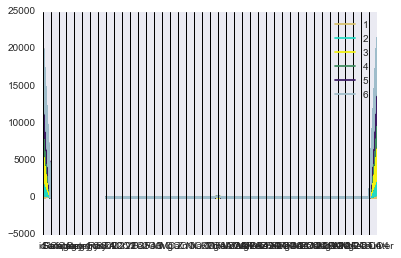

In [4]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(alask.drop("results", axis=1), "id_stone")